# Homework #2

**Due in class on Friday February 1, 2019**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel is preferred). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


Name: Adam Ten Hoeve

## A. Theoretical Problems

### Problem A.1


**This problem might require some outside-of-class research if you haven't taken a linear algebra/matrix methods course.**

Matrices and vectors will play an important role for us in linear regression. Let's review some matrix theory as it might relate to linear regression.

Consider the system of linear equations 

\begin{equation} 
Y_i = \beta_0 + \sum^p_{j=1}\beta_j X_{i,j} + \varepsilon_i,
\end{equation}
for $i = 1,...,n$, where $n$ is the number of data points (measurements in the sample), and $j = 1,...,p$, where 

1. $p+1$ is the number of parameters in the model. 
2. $Y_i$ is the $i^{th}$ measurement of the *response variable*.
3. $X_{i,j}$ is the $i^{th}$ measurement of the $j^{th}$ *predictor variable*.
4. $\varepsilon_i$ is the $i^{th}$ *error term* and is a random variable (often assumed to be $N(0, \sigma^2)$). 
5. $\beta_j$ are *unknown parameters* of the model, ($j = 0,...,p$). We hope to estimate these, which would help us characterize the relationship between the predictors and response.

#### (a)  Write the equation above in matrix vector form. Call the matrix including the predictors $X$, the vector of $Y_i$s $\mathbf{Y}$, the vector of parameters $\mathbf{\beta}$, and the vector of error terms $\mathbf{\varepsilon}$. 


$$Y = X\beta + \epsilon$$

#### (b) In class, we will find that the OLS estimator for $\mathbf{\beta}$ in MLR is $\widehat{\boldsymbol\beta} = (X^TX)^{-1}X^T\mathbf{Y}$. 


1. What condition must be true about the columns of $X$ for the "Gram" matrix $X^TX$ to be invertible? 
2. What does this condition mean in practical terms? 
3. Suppose that the number of measurements ($n$) is less than the number of model parameters ($p+1$). What does this say about the invertibility of $X^TX$? What does this mean on a practical level?
4. What is true about about $\widehat{\boldsymbol\beta}$ if $X^TX$ is not invertible?




1. A Gram Matrix $X^TX$ is invertible if and only if the columns of $X$ are linearly independent.
2. Linear independence means that a column can not be represented as a combination of other rows and columns in the matrix. 
3. The matrix $X$ has $n$ rows and $p+1$ columns. Therefor, if $p+1 > n$ then there is always more vectors than is needed to span the space, meaning the columns are not linearly independent and $X^TX$ is not invertible. On a practical level, this means that if we have more predictors than observations, then we can not use the above equation as an estimator.
4. If $X^TX$ is not invertible, then $\widehat{\beta}$ either has no solution or infinite solutions.

## B. Computational Problems

### Problem B.1

Let $X_1,...,X_{n_1}$ be an iid sample from population #1, with unknown mean $\mu_1$ and known standard deviation $\sigma_1$, and let $Y_1,...,Y_{n_2}$ be an iid sample from population #2, with unknown mean $\mu_2$ and known standard deviation $\sigma_2$. Suppose we want to conduct a hypothesis test of the sort: $$H_0: \mu_1 - \mu_2 = 0 \,\,\, vs \,\,\, H_1: \mu_1 - \mu_2 \ge 0. $$

The following algorithm has been suggested for a bootstrap test.

1. Calculate the test statistic $$t = \frac{\bar{x} - \bar{y}}{\sqrt{\sigma^2_1\big/n_1 + \sigma^2_2\big/n_2}}$$
 
2. Let $\bar{z}$ be the mean of the combined data sets. Create two new data sets, $x^\prime_1,...,x^\prime_{n_1}$ and $y^\prime_1,...,y^\prime_{n_2}$ that are the original data sets centered at $\bar{z}$.

3. Draw $B$ random bootstrap samples of size $n_1$ from $x^\prime_1,...,x^\prime_{n_1}$ and of size $n_2$ from $y^\prime_1,...,y^\prime_{n_2}$. The result will be two matrices, $x^*$ and $y^*$; $x^*$ will containin columns of bootstrap samples from sample #1, and $y^*$ will contain columns of bootstrap samples from sample #2.

4. Then, for each bootstrap sample pair, calculate 

$$t^* = \frac{\bar{x^*}_j - \bar{y^*}_j}{\sqrt{\sigma^{*^2}_1\big/n_1 + \sigma^{*^2}_2\big/n_2}},$$

where $\bar{x^*}_j$ is the sample mean of the $j^{th}$ bootstrap sample from sample #1, and $\bar{y^*}_j$ is the sample mean of the $j^{th}$ bootstrap sample from sample #2. $\sigma^{*^2}_1$ and $\sigma^{*^2}_2$ are the corresponding variance estimates of the $j^{th}$ bootstrap sample. $t^*$ will be a vector of length $B$ and will approximate the distribution of the test statistic $t$.

5. Estimate the p-value using $$\frac{\text{# of times }\{t^* \ge t \}}{B}.$$ 



#### (a) Generate $X_1,...,X_{20} \overset{iid}{\sim} N(0,2)$ and $Y_1,...,Y_{15} \overset{iid}{\sim} N(1,3)$, and then forget that you know $\mu_1 = 0$ and $\mu_2 = 1$. Use the bootstrap method described above to test $$H_0: \mu_1 - \mu_2 = 0 \,\,\, vs \,\,\, H_1: \mu_1 - \mu_2 \ge 0. $$

In [208]:
n1 = 20; mu1 = 0; var1 = 2;
x = rnorm(n = n1, mean = mu1, sd = sqrt(var1))
xbar = mean(x)

n2 = 15; mu2 = 1; var2 = 3;
y = rnorm(n = n2, mean = mu2, sd = sqrt(var2))
ybar = mean(y)

In [209]:
# Calculate the test statistic
t = (xbar - ybar) / sqrt((var1 / n1) + (var2 / n2))
t

[1] -2.955349

In [210]:
# Create zbar from both sets and center x and y at zbar to make xPrime and yPrime
z = c(x, y)
zbar = mean(z)

xPrime = x - xbar + zbar
yPrime = y - ybar + zbar

In [211]:
# Generate B bootstrap samples from xPrime and yPrime to get xStar and yStar
B = 5000
xStar = replicate(B, sample(xPrime, size = n1, replace = TRUE))
yStar = replicate(B, sample(yPrime, size = n2, replace = TRUE))

# Calculate mean and variance of each column
xStarBar = colMeans(xStar)
xStarVar = apply(xStar, 2, var)

yStarBar = colMeans(yStar)
yStarVar = apply(yStar, 2, var)

In [212]:
# For each bootstrap sample pair, calculate tStar.
tStar = (xStarBar - yStarBar) / sqrt((xStarVar / n1) + (yStarVar / n2))
length(tStar)

[1] 5000

In [213]:
# Calculate the estimated p-value
pval = sum(tStar >= t) / B
cat("Out estimated p-value is", pval)

Out estimated p-value is 0.9968

Because our estimated p-value is $\sim 0.9968 > 0.05$, we fail to reject the null hypothesis and assert that $\mu_1 - \mu_2 = 0$.

#### (b) Use t.test() to test the hypotheses in part (a).

In [214]:
t.test(x, y, alternative = "greater")


	Welch Two Sample t-test

data:  x and y
t = -3.0246, df = 28.155, p-value = 0.9974
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -2.528958       Inf
sample estimates:
 mean of x  mean of y 
-0.7472115  0.8714996 


#### (c) How much do the answers from (a) and (b) differ? Explain the relationship between these tests.

The two p-values are very similar, only having a 0.0006 difference between the two. Both tests perform the same functions, testing what the probability of observing the data is assuming that the null is true. In running the above code 3 times, we get different p-values for both tests: (0.9854, 0.9771), <br /> (0.9810, 0.9849), (0.7914, 0.79). Each time the tests are very similar, even if the relative p-values change based on the random samples. If our original samples had more data, we could expect both tests to be more constant in their evaluations. Similarly, we would likely see a greater difference between the two p-values if we used fewer bootstrap samples, such as 500 instead of 5000.

### Problem B.2

A tennis club has two systems to measure the speed of a tennis ball. The local tennis pros suspect one system, ${\tt speed1}$, is consistently recording faster speeds. To test her suspicions, she sets up both systems and records the speed of 12 serves (three serves from each side of the court). The values are stored in the data frame ${\tt TENNIS}$, with variables ${\tt speed1}$ and ${\tt speed2}$. The recorded speeds are in kilometers per hour. You can access ${\tt TENNIS}$ by installing the PASWR2 package (if you haven't dont so already: install.packages("PASWR2")) and running:

library(PASWR2)

data(TENNIS)


#### Does the evidence support the tennis pro's suspicion? Use the above bootstrap hypothesis testing procedure and $\alpha = 0.1$. 

In [87]:
#install.packages("PASWR2",dependencies = TRUE)
library(PASWR2)
data(TENNIS)

s1 = TENNIS$speed1
s2 = TENNIS$speed2

# Get the length, sample mean and sample variance from each sample.
n1 = length(s1)
s1Bar = mean(s1)
s1Var = var(s1)

n2 = length(s2)
s2Bar = mean(s2)
s2Var = var(s2)

Loading required package: lattice
Loading required package: ggplot2


In [88]:
# Calculate the test statistic
t = (s1Bar - s2Bar) / sqrt((s1Var / n1) + (s2Var / n2))
t

[1] -0.2674647

In [89]:
# Calculate zBar from both statisitcs and center s1 and s2 at zBar
z = c(s1, s2)
zBar = mean(z)

s1Prime = s1 - s1Bar + zBar
s2Prime = s2 - s2Bar + zBar

In [90]:
# Generate B bootstrap samples from s1Prime and s2Prime
B = 5000
s1Star = replicate(B, sample(s1Prime, size = n1, replace = TRUE))
s2Star = replicate(B, sample(s2Prime, size = n2, replace = TRUE))

s1StarBar = colMeans(s1Star)
s1StarVar = apply(s1Star, 2, var)

s2StarBar = colMeans(s2Star)
s2StarVar = apply(s2Star, 2, var)

In [91]:
# Calculate tStar
tStar = (s1StarBar - s2StarBar) / sqrt((s1StarVar / n1) + (s2StarVar / n2))
length(tStar)

[1] 5000

In [92]:
# Calculate estimated p-value
pval = sum(tStar >= t) / B
pval

[1] 0.593

Using the bootstrap method from **Problem B.1**, we get a p-value of 0.593 > 0.1 so we fail to reject the null and assert that the two systems do not have a significant difference in their speed measurements.

### Problem B.3
Let $X_1,...,X_{30} \overset{iid}{\sim}N(1,9)$. The formula for a 90% confidence interval for $\mu$ is 

$$\bar{X} \pm 1.64\frac{\sigma}{\sqrt{n}}.$$

Let's conduct a simulation to confirm the coverage of this confidence interval.

#### (a) Generate $m = 500$ random samples of size $n = 30$ from $N(1,9)$ and calculate the 90% confidence interval for each. Don't print anything.

In [94]:
sigma = 3
m = 500
n = 30
x = replicate(m, sample(rnorm(n = n, mean = 1, sd = sigma)))
xBar = colMeans(x)
lowers = xBar - (1.64 * sigma / sqrt(n))
uppers = xBar + (1.64 * sigma / sqrt(n))
CIs = matrix(c(lowers, uppers), ncol = 2)

#### (b) Estimate the coverage by finding the number of intervals that cover the true mean, and dividing my $m$.

In [95]:
isMeanCovered <- function(x){
    return(x[1] <= 1 && x[2] >= 1)
}

In [96]:
coverage = sum(apply(CIs, 1, isMeanCovered)) / m
coverage

[1] 0.9

The coverage of the Confidence Intervals is 0.9. This makes sense because we're evaluating our confidence intervals at 90% significance, meaning that we expect 9/10 of them to cover the true mean, which is confirmed by the calculations.

### Problem B.4

Suppose that $X_1,...,X_8 \overset{iid}{\sim} Exp(\lambda)$. 


#### (a) Compute a $90\%$ pivot confidence interval for the population variance: $Var(X) = 1/\lambda^2 = \theta$.



In [102]:
set.seed(99)
lambda = 5
trueVar = 1/(lambda^2)
n = 8
x = rexp(n = n, rate = lambda)
thetaHat = mean(x)^2
# thetaHat
# Bootstrap samples
B = 5000
boots = replicate(B, sample(x, size = n, replace = TRUE))
thetaStarHat = apply(boots, 2, mean)^2
# mean(thetaStarHat)
lower = 2*thetaHat - as.numeric(quantile(thetaStarHat, probs = 0.95))
upper = 2*thetaHat - as.numeric(quantile(thetaStarHat, probs = 0.05))
CI = c(lower, upper)
cat("The 90% pivot confidence interval is", CI)

The 90% pivot confidence interval is 0.02337527 0.05238412

#### (b) Investigate the coverage of the bootstrap pivot confidence interval from part (a).

In [103]:
isVarCovered <- function(x){
    return((x[1] <= trueVar) && (x[2] >= trueVar))
}

In [109]:
m = 500 # Number of confidence intervals
B = 500 # Number of bootstraps per confidence interval
CIs = matrix(nrow = m, ncol = 2)

# Bootstrap samples
for(i in 1:m){
    # Generate B bootstrap samples from x
    boots = replicate(B, sample(x, size = n, replace = TRUE))
    # Calculate the variance of each column
    thetaStarHat = apply(boots, 2, mean)^2
    # Calculate the upper and lower bounds on the CI
    lower = 2*thetaHat - as.numeric(quantile(thetaStarHat, probs = 0.95))
    upper = 2*thetaHat - as.numeric(quantile(thetaStarHat, probs = 0.05))
    # Add the new CI as a new row in the matrix of CIs
    CIs[i, ] = c(lower, upper)
}
# We now have an m by 2 matrix of CIs. Want to see how many cover the true variance.
coverage = sum(apply(CIs, 1, isVarCovered)) / m
coverage

[1] 1

After running multiple tests, we have found that the pivot confidence interval does not give us an accurate measurement. This is due to how skewed the data from the original sample is, as shown in the above histogram. The initial sample from the exponential distribution greatly affects whether all or none of the bootstrap data covers the true mean. Even with different size samples (changing n), different numbers of bootstraps (B), and different numbers of confidence intervals (m), this has been consistant across our trials.

### Problem B.5

#### (a) Load the "gala" dataset, and describe the variables. 

In [64]:
# install.packages("faraway", dependencies = TRUE)
library(faraway)
data(gala)
head(gala)

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,23,25.09,346,0.6,0.6,1.84
Bartolome,31,21,1.24,109,0.6,26.3,572.33
Caldwell,3,3,0.21,114,2.8,58.7,0.78
Champion,25,9,0.10,46,1.9,47.4,0.18
Coamano,2,1,0.05,77,1.9,1.9,903.82
Daphne.Major,18,11,0.34,119,8.0,8.0,1.84


The data is about different plant species among the 30 Galapagos islands. Each row is a seperate island and the column variables include:
- Species: The number of plant species on the island.
- Endemics: The number of endemic species.
- Area: The area of the island in $km^2$.
- Elevation: The highest elevation of the island in $m$.
- Nearest: The distance from the nearest island in $km$.
- Scruz: The distance from Santa Cruz island in $km$.
- Adjacent: The area of the adjacent island in $km^2$.

#### (b) Explore the relationship between the Species variable (response) and Endemics, Elevation, Nearest, and Adjacent (predictor variables). You might do so by creating four separate scatter plots (ideally, using ggplot()!). Do these relationships look linear? Does the variability in Species change as a function of any of the predictors? Are there any outliers in any of the plots?

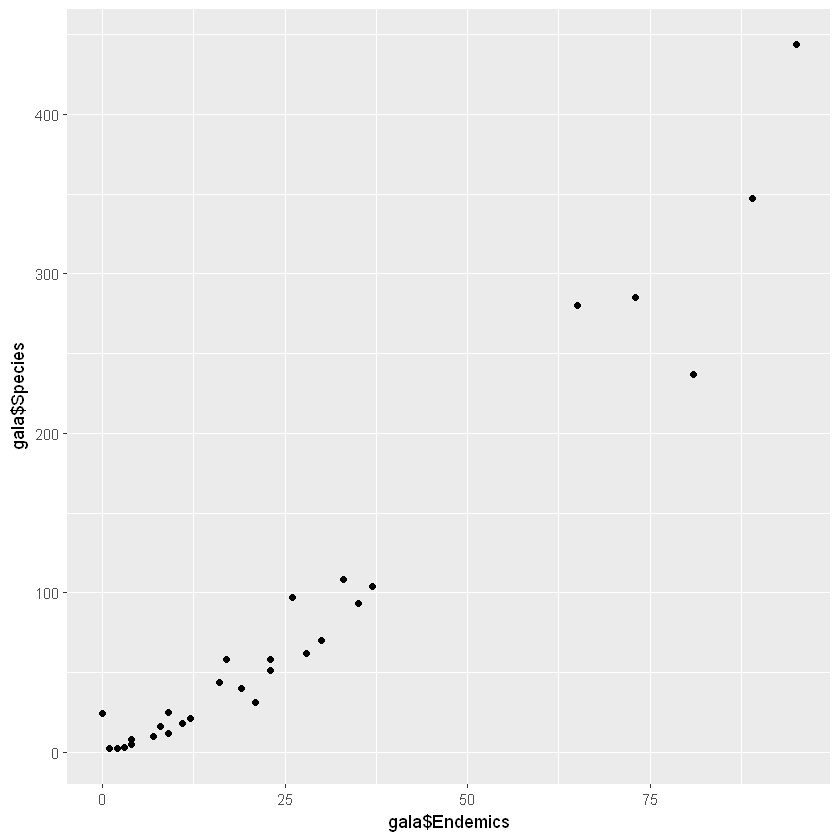

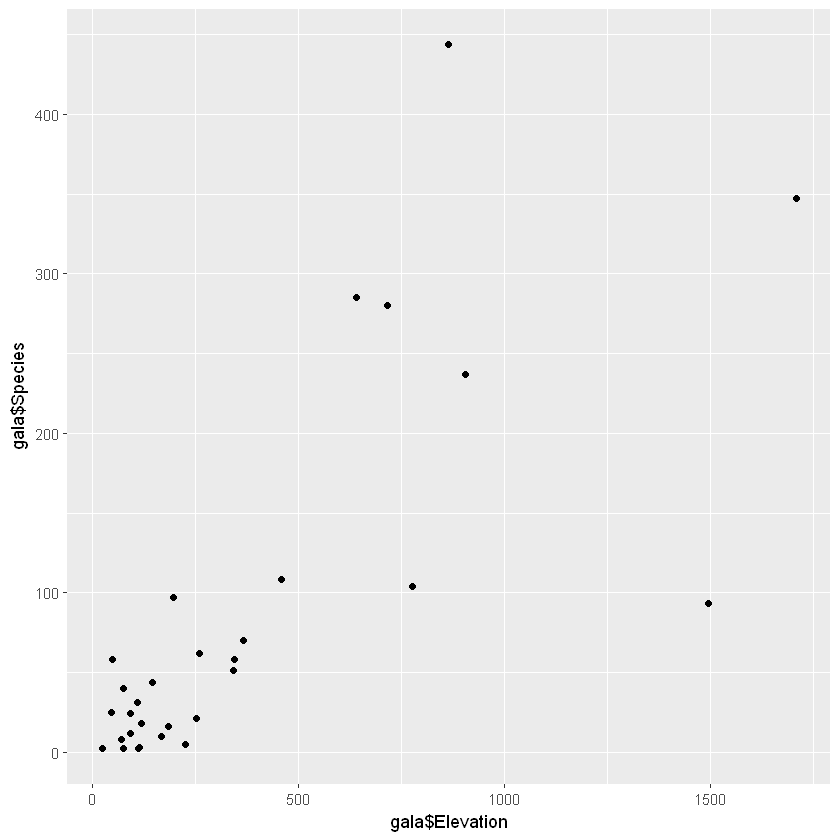

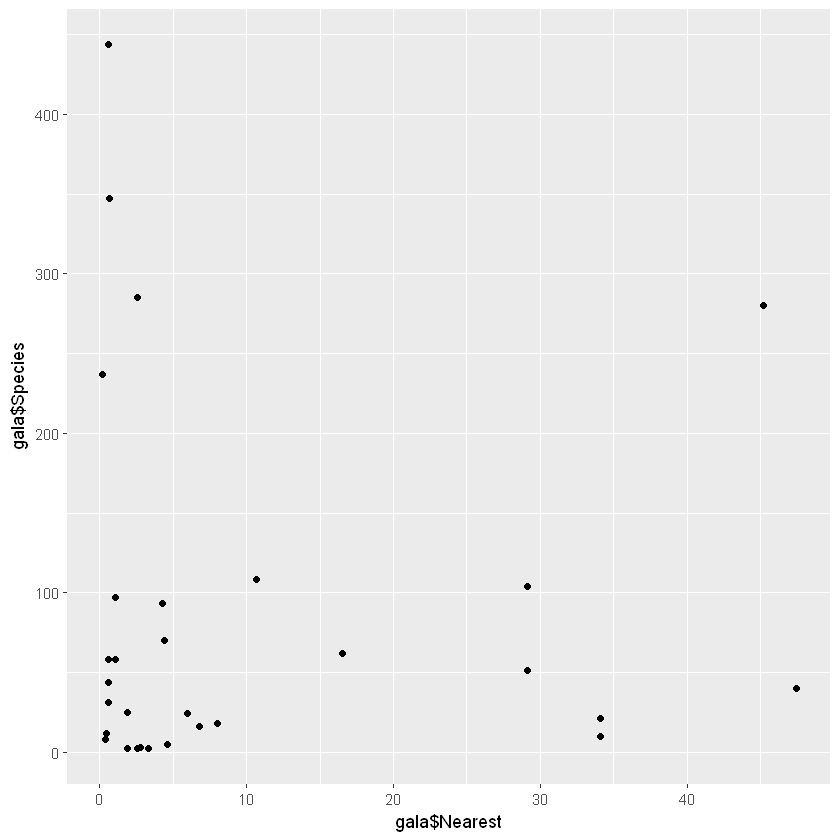

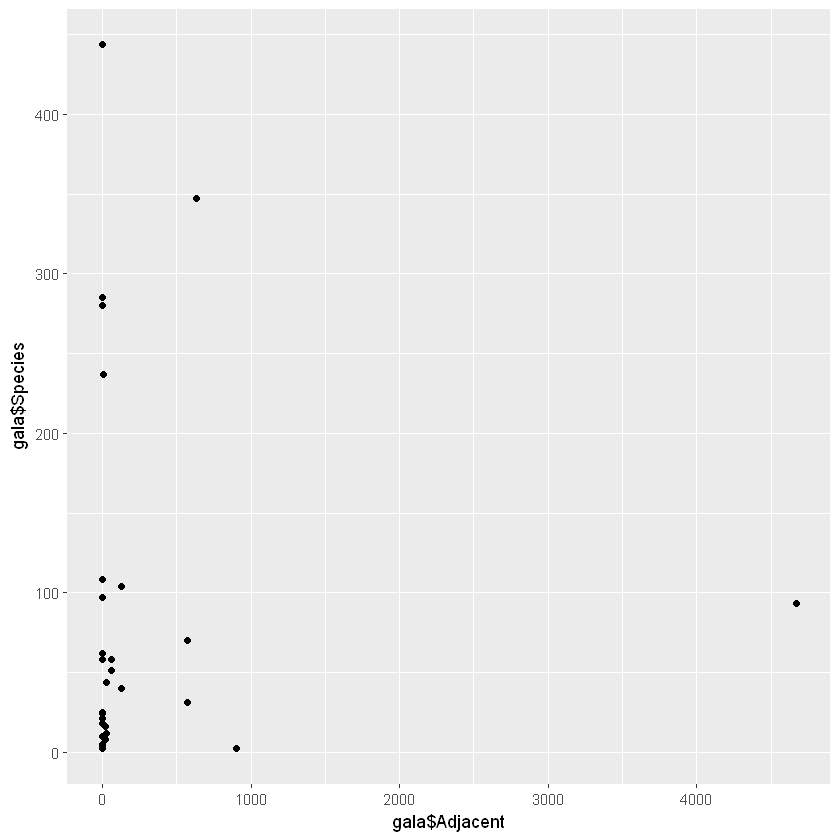

In [103]:
library(ggplot2)
# ggplot(data = nameofdata) + geom_point(mapping = aes(x = predictor, y = response))
ggplot(data = gala) + geom_point(mapping = aes(x = gala$Endemics, y = gala$Species))
ggplot(data = gala) + geom_point(mapping = aes(x = gala$Elevation, y = gala$Species))
ggplot(data = gala) + geom_point(mapping = aes(x = gala$Nearest, y = gala$Species))
ggplot(data = gala) + geom_point(mapping = aes(x = gala$Adjacent, y = gala$Species))

Based on the scatterplots, we can make a reasonable guess as to the correlation between the predictors and the response. The Endemic and Elevation data both appear to be positively, linearly correlated to the number of species whereas the Nearest and Adjacent data do not appear correlated to the number of species.

The variability of the correlated plots, being Endemic and Elevation, is notable. The Endemic data seems to have some spread in the number of species as Endemic predictor is increased, but not a large amount. In contrast, the variablility of the Elevation data is much greater as the data is relatively close when Elevation is low but very spread out when Elevation is high.

The Species data is linear without any obvious outliers but the Elevation data does have more apparent outliers. The $\sim (1500, 95)$ and $\sim (850, 500)$ points are the most notable outliers and do not follow the linear relationship of the rest of the data. Because the Nearest and Adjacent data don't appear to be correlated to the number of species, it is not entirely useful to classify some of the points as outliers.